In [1]:
import pandas as pd
# загрузка данных
df = pd.read_csv("data/students_education.csv")
# сохранение данных
df.to_csv("lab1.csv")

In [2]:
# получение сведений о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1204 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1201 non-null   object
 8   Internet Type        1204 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [3]:
df.dtypes

Education Level        object
Institution Type       object
Gender                 object
Age                     int64
Device                 object
IT Student             object
Location               object
Financial Condition    object
Internet Type          object
Network Type           object
Flexibility Level      object
dtype: object

In [4]:
# вывод первых 100 строк из столбца Education Level
education = df.iloc[0:100, 0]
print(education)


0     University
1     University
2        College
3         School
4         School
         ...    
95    University
96        School
97        School
98    University
99       College
Name: Education Level, Length: 100, dtype: object


In [5]:
# сортировка датафрейма по возрасту
sorted_df = df.sort_values(by="Age")
print(sorted_df)

     Education Level Institution Type  Gender  Age    Device IT Student  \
54            School          Private    Male    9    Mobile         No   
55            School          Private  Female    9    Mobile         No   
1155          School          Private  Female    9    Mobile         No   
886           School          Private  Female    9    Mobile         No   
916           School          Private  Female    9    Mobile         No   
...              ...              ...     ...  ...       ...        ...   
1157      University           Public    Male   27  Computer        Yes   
714       University           Public  Female   27    Mobile         No   
717       University           Public  Female   27    Mobile         No   
16        University           Public  Female   27  Computer        Yes   
1190      University          Private    Male   27    Mobile        Yes   

     Location Financial Condition Internet Type Network Type Flexibility Level  
54       Town     

In [6]:
# вывод студентов, которым 18 лет и больше
Age = df[df['Age'] >= 18]
print(Age)

     Education Level Institution Type  Gender  Age    Device IT Student  \
0         University          Private    Male   23       Tab         No   
1         University          Private  Female   23    Mobile         No   
2            College           Public  Female   18    Mobile         No   
4             School          Private  Female   18    Mobile         No   
8            College           Public    Male   18    Mobile         No   
...              ...              ...     ...  ...       ...        ...   
1198         College           Public    Male   18    Mobile        Yes   
1199      University          Private    Male   23  Computer        Yes   
1200         College          Private  Female   18    Mobile         No   
1201         College          Private  Female   18    Mobile         No   
1203         College          Private  Female   18    Mobile         No   

     Location Financial Condition Internet Type Network Type Flexibility Level  
0        Town     

In [7]:
df.drop(['Location'], axis=1).head()

Education Level Institution Type  Gender  Age  Device IT Student  \
0      University          Private    Male   23     Tab         No   
1      University          Private  Female   23  Mobile         No   
2         College           Public  Female   18  Mobile         No   
3          School          Private  Female   11  Mobile         No   
4          School          Private  Female   18  Mobile         No   

  Financial Condition Internet Type Network Type Flexibility Level  
0                 Mid          Wifi           4G          Moderate  
1                 NaN   Mobile Data           4G          Moderate  
2                 Mid          Wifi           4G          Moderate  
3                 NaN   Mobile Data           4G          Moderate  
4                Poor           NaN           3G               Low

In [8]:
# добавление нового столбца Возрастная группа
def age_group(value):
    if value < 18:
        return "young"
    else:
        return "average"

df['age_group'] = df['Age'].map(age_group)
display(df)

Education Level Institution Type  Gender  Age  Device IT Student  \
0         University          Private    Male   23     Tab         No   
1         University          Private  Female   23  Mobile         No   
2            College           Public  Female   18  Mobile         No   
3             School          Private  Female   11  Mobile         No   
4             School          Private  Female   18  Mobile         No   
...              ...              ...     ...  ...     ...        ...   
1200         College          Private  Female   18  Mobile         No   
1201         College          Private  Female   18  Mobile         No   
1202          School          Private    Male   11  Mobile         No   
1203         College          Private  Female   18  Mobile         No   
1204          School          Private  Female   11  Mobile         No   

     Location Financial Condition Internet Type Network Type  \
0        Town                 Mid          Wifi           4G   
1        Town                 NaN   Mobile Data           4G   
2        Town                 Mid          Wifi           4G   
3        Town                 NaN   Mobile Data           4G   
4        Town                Poor           NaN           3G   
...       ...                 ...           ...          ...   
1200     Town                 Mid          Wifi           4G   
1201    Rural                 Mid          Wifi           4G   
1202     Town                 Mid   Mobile Data           3G   
1203    Rural                 Mid          Wifi           4G   
1204     Town                Poor   Mobile Data           3G   

     Flexibility Level age_group  
0             Moderate   average  
1             Moderate   average  
2             Moderate   average  
3             Moderate     young  
4                  Low   average  
...                ...       ...  
1200               Low   average  
1201          Moderate   average  
1202          Moderate     young  
1203               Low   average  
1204          Moderate     young  

[1205 rows x 12 columns]

In [9]:
# удаление строк с пустыми значениями
df_cleaned = df.dropna()
print(df_cleaned)

     Education Level Institution Type  Gender  Age  Device IT Student  \
0         University          Private    Male   23     Tab         No   
2            College           Public  Female   18  Mobile         No   
5             School          Private    Male   11  Mobile         No   
8            College           Public    Male   18  Mobile         No   
9             School          Private    Male   11  Mobile         No   
...              ...              ...     ...  ...     ...        ...   
1200         College          Private  Female   18  Mobile         No   
1201         College          Private  Female   18  Mobile         No   
1202          School          Private    Male   11  Mobile         No   
1203         College          Private  Female   18  Mobile         No   
1204          School          Private  Female   11  Mobile         No   

     Location Financial Condition Internet Type Network Type  \
0        Town                 Mid          Wifi           4

In [10]:
# Вычисление моды (наиболее часто встречающегося значения) для пустых значений
mode_Financial = df['Financial Condition'].mode()[0]  
df.fillna({'Financial Condition':mode_Financial}, inplace=True)
print(df)

     Education Level Institution Type  Gender  Age  Device IT Student  \
0         University          Private    Male   23     Tab         No   
1         University          Private  Female   23  Mobile         No   
2            College           Public  Female   18  Mobile         No   
3             School          Private  Female   11  Mobile         No   
4             School          Private  Female   18  Mobile         No   
...              ...              ...     ...  ...     ...        ...   
1200         College          Private  Female   18  Mobile         No   
1201         College          Private  Female   18  Mobile         No   
1202          School          Private    Male   11  Mobile         No   
1203         College          Private  Female   18  Mobile         No   
1204          School          Private  Female   11  Mobile         No   

     Location Financial Condition Internet Type Network Type  \
0        Town                 Mid          Wifi           4

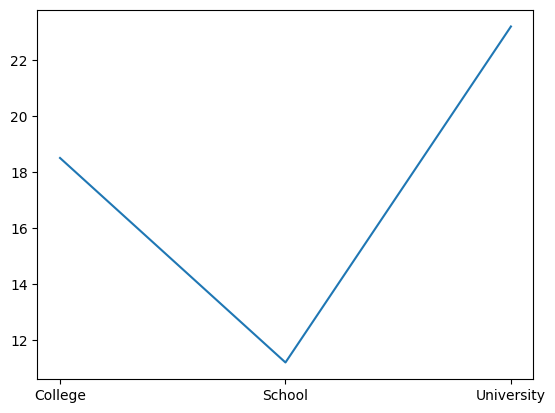

In [11]:
# линейная диаграмма (средний возраст по уровню образования)
import matplotlib.pyplot as plt
plt.plot(df[["Education Level", "Age"]].groupby("Education Level").mean())
plt.show()

<Axes: ylabel='Frequency'>

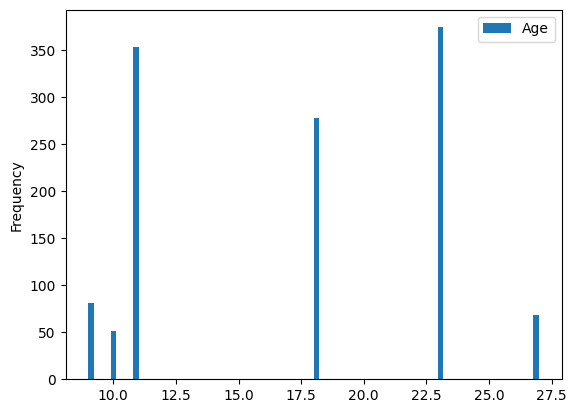

In [12]:
# гистограмма
df.plot.hist(column=["Age"], bins=80)

Age    Axes(0.125,0.11;0.775x0.77)
dtype: object

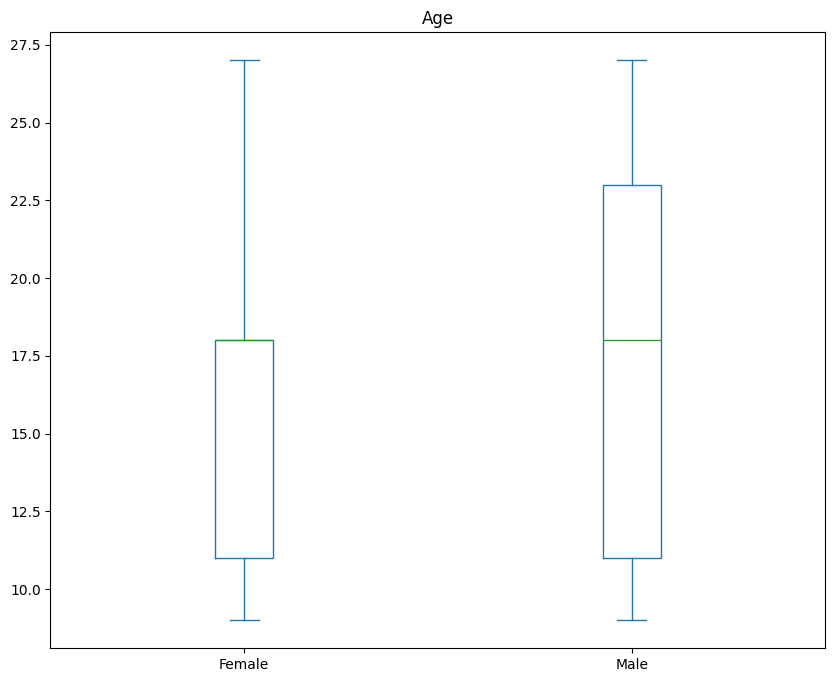

In [13]:
# ящик с усами
df.plot.box(column="Age", by="Gender", figsize=(10, 8))

<Axes: xlabel='Education Level'>

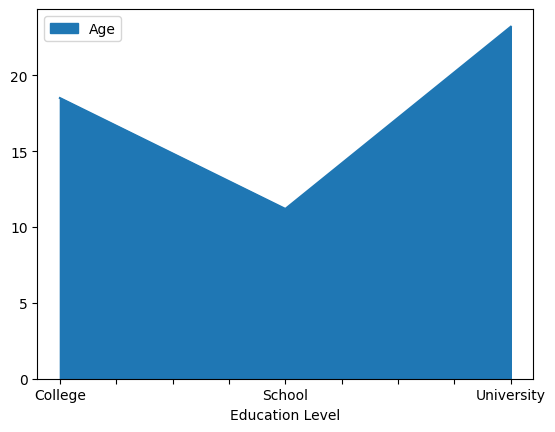

In [14]:
# диаграмма с областями 
data = (df[[ "Education Level", "Age"]].groupby(['Education Level']).mean())
data.plot.area()

<Axes: xlabel='Age', ylabel='Education Level'>

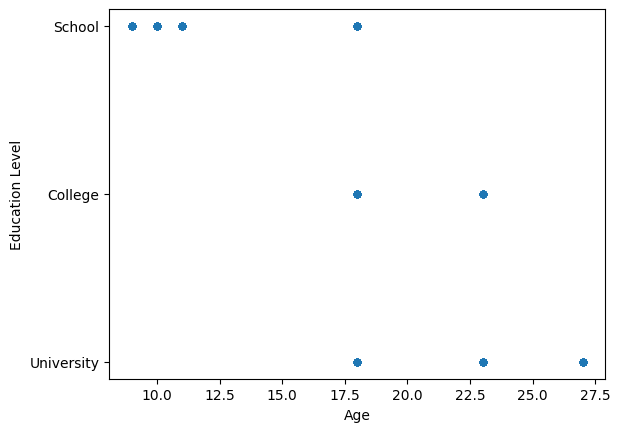

In [15]:
# диаграмма рассеяния 
df.plot.scatter(x ="Age", y ="Education Level")

<Axes: ylabel='Age'>

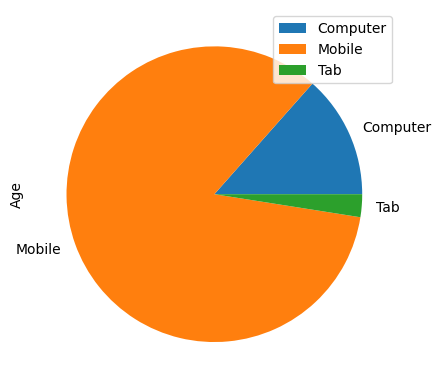

In [16]:
# круговая диаграмма 
data = (df[[ "Device", "Age"]].groupby(['Device']).count())
data.plot.pie(x ='Device', y ='Age')